# Imports

In [1]:
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , mean_absolute_percentage_error

import tensorflow as tf
from tensorflow.keras.layers import LSTM , Dropout , Dense
from tensorflow.keras.models import Sequential
import pandas_datareader.data as web
import datetime

import datetime
import pandas as pd 
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('../../data/EQ_daily/AXISBANKEQ.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
df.drop(df[df['High']==df['Low']].index , axis=0 , inplace=True)
df.head()

,Ticker,Date,Time,Open,High,Low,Close,Volume,OI
Date,,,,,,,,,
1998-12-02,AXISBANKEQ,1998-12-02,00:00:00,3.36,3.44,3.32,3.39,75000,0
1998-12-03,AXISBANKEQ,1998-12-03,00:00:00,3.89,3.89,3.36,3.40,538000,0
1998-12-04,AXISBANKEQ,1998-12-04,00:00:00,3.37,3.39,3.26,3.31,182000,0
1998-12-07,AXISBANKEQ,1998-12-07,00:00:00,3.31,3.35,3.29,3.33,112500,0
1998-12-08,AXISBANKEQ,1998-12-08,00:00:00,3.27,3.32,3.20,3.25,271000,0


In [3]:
df['pct_change'] = df['Close'].pct_change()

In [4]:
df.dropna(inplace=True)

In [5]:
data = df['pct_change'].copy()

In [6]:
# Training and testing data
train_size = int(len(data) *0.80)
train = data[:train_size]
test = data[train_size :]

In [7]:
X_train = []
y_train = []

for i in range(60,len(train)-1):
    X_train.append(train[i-60:i])
    
    y_train.append(train[i])

In [8]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [9]:
X_test = []
y_test = []

for i in range(60,len(test)-1):
    X_test.append(test[i-60 :i])
    
    y_test.append(test[i])

In [10]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [11]:
lstm = Sequential()
lstm.add(LSTM(60 ,return_sequences=True ,  input_shape=(60,1)))
lstm.add(LSTM(30 , return_sequences = True))
lstm.add(LSTM(10))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error' , optimizer='adam' , metrics=['accuracy','mse'])

In [12]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            14880     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 30)            10920     
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                1640      
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 27,451
Trainable params: 27,451
Non-trainable params: 0
_________________________________________________________________


In [13]:
X_train = X_train.reshape((-1 ,60 , 1))
X_test = X_test.reshape((-1,60,1))

In [14]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [16]:
lstm.fit(X_train ,y_train , validation_data=(X_test,y_test) ,epochs=100 , batch_size=64 ,verbose=1 )

Epoch 1/100
63/63 [==============================] - 4s 65ms/step - loss: 9.7217e-04 - accuracy: 0.0145 - mse: 9.7217e-04 - val_loss: 3.9812e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.9812e-04
Epoch 2/100
63/63 [==============================] - 4s 64ms/step - loss: 9.7012e-04 - accuracy: 0.0145 - mse: 9.7012e-04 - val_loss: 3.5406e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.5406e-04
Epoch 3/100
63/63 [==============================] - 4s 66ms/step - loss: 9.6870e-04 - accuracy: 0.0145 - mse: 9.6870e-04 - val_loss: 3.6958e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.6958e-04
Epoch 4/100
63/63 [==============================] - 4s 65ms/step - loss: 9.7835e-04 - accuracy: 0.0145 - mse: 9.7835e-04 - val_loss: 3.5538e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.5538e-04
Epoch 5/100
63/63 [==============================] - 4s 66ms/step - loss: 9.7205e-04 - accuracy: 0.0145 - mse: 9.7205e-04 - val_loss: 3.5949e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.5949e-04
Epoch 6/100
63/63 [===========

63/63 [==============================] - 4s 67ms/step - loss: 9.6571e-04 - accuracy: 0.0145 - mse: 9.6571e-04 - val_loss: 3.5360e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.5360e-04
Epoch 44/100
63/63 [==============================] - 4s 67ms/step - loss: 9.6348e-04 - accuracy: 0.0145 - mse: 9.6348e-04 - val_loss: 3.6249e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.6249e-04
Epoch 45/100
63/63 [==============================] - 5s 76ms/step - loss: 9.6727e-04 - accuracy: 0.0145 - mse: 9.6727e-04 - val_loss: 3.5887e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.5887e-04
Epoch 46/100
63/63 [==============================] - 4s 69ms/step - loss: 9.6629e-04 - accuracy: 0.0145 - mse: 9.6629e-04 - val_loss: 3.5429e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.5429e-04
Epoch 47/100
63/63 [==============================] - 4s 68ms/step - loss: 9.6624e-04 - accuracy: 0.0145 - mse: 9.6624e-04 - val_loss: 3.5701e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.5701e-04
Epoch 48/100
63/63 [==================

63/63 [==============================] - 4s 66ms/step - loss: 9.6429e-04 - accuracy: 0.0145 - mse: 9.6429e-04 - val_loss: 3.5761e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.5761e-04
Epoch 86/100
63/63 [==============================] - 4s 66ms/step - loss: 9.6864e-04 - accuracy: 0.0145 - mse: 9.6864e-04 - val_loss: 3.5451e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.5451e-04
Epoch 87/100
63/63 [==============================] - 4s 66ms/step - loss: 9.6508e-04 - accuracy: 0.0145 - mse: 9.6508e-04 - val_loss: 3.5451e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.5451e-04
Epoch 88/100
63/63 [==============================] - 4s 66ms/step - loss: 9.6650e-04 - accuracy: 0.0145 - mse: 9.6650e-04 - val_loss: 3.6659e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.6659e-04
Epoch 89/100
63/63 [==============================] - 4s 66ms/step - loss: 9.6517e-04 - accuracy: 0.0145 - mse: 9.6517e-04 - val_loss: 3.5459e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.5459e-04
Epoch 90/100
63/63 [==================

In [17]:
lstm.save('./models/lstmYahooPctChange/AxisBankPctChange.h5')

In [18]:
training_predictions = lstm.predict(X_train)

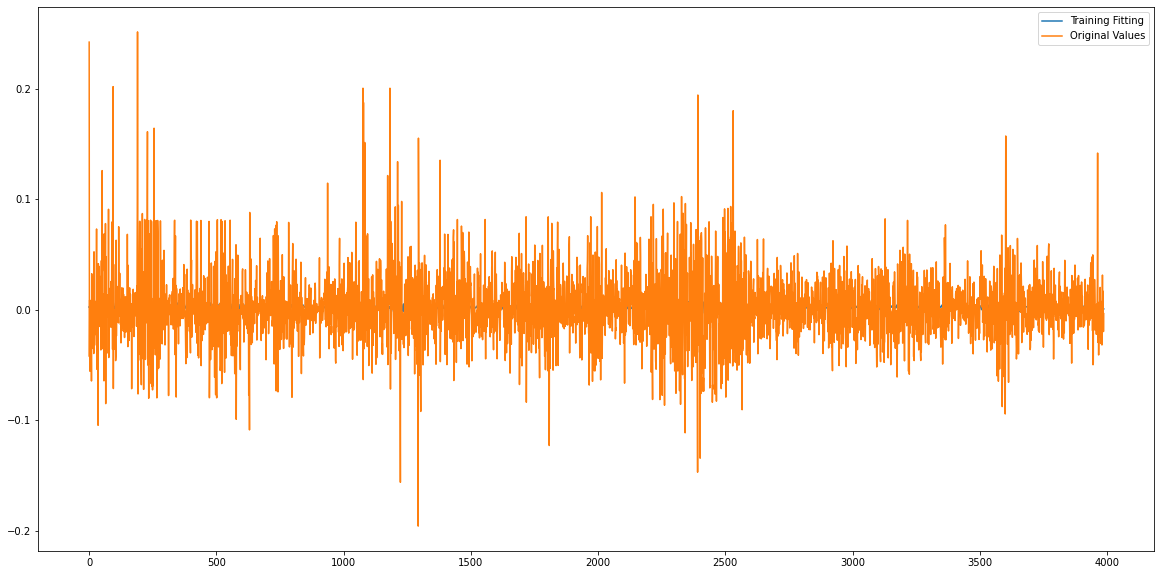

In [19]:
plt.figure(figsize=(20,10))
plt.plot(training_predictions , label='Training Fitting')
plt.plot(np.array(y_train).reshape(-1,1) ,label='Original Values')
plt.legend()
plt.show()

In [20]:
preds = lstm.predict(X_test)

In [21]:
index = test[61:].index

In [22]:
asdf = preds.reshape(1,-1).tolist()

In [23]:
original = test[61:]

In [58]:
data = {'Original':original,
        'Prediction': asdf[0]}

In [59]:
df1 = pd.DataFrame(data=data , index =index)

In [58]:
df.to_csv('./outputs/axisbankpreds.csv')

<AxesSubplot:xlabel='Date'>

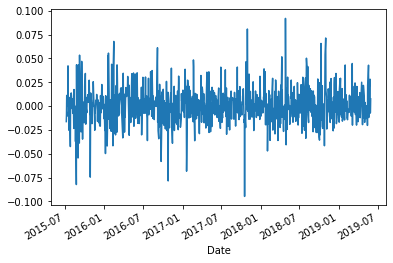

In [60]:
df1['Original'].plot()

In [83]:
df2 = pd.read_csv('./outputs/axisbankout.csv')

In [84]:
df2.index = df2['Date']
df2.drop('Date' ,axis=1, inplace=True )

In [85]:
df2

,Original,Prediction
Date,,
2017-07-19,520.20,505.185608
2017-07-20,540.00,509.415924
2017-07-21,540.80,513.137878
2017-07-24,534.80,527.359436
2017-07-25,544.95,529.255676
...,...,...
2019-05-24,791.65,752.361145
2019-05-27,814.00,755.352783
2019-05-28,808.00,766.371643


In [48]:
df.asfreq('Y')

,Ticker,Date,Time,Open,High,Low,Close,Volume,OI
Date,,,,,,,,,
1998-12-31,AXISBANKEQ,1998-12-31,00:00:00,3.57,3.57,3.31,3.33,121500.0,0.0
1999-12-31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,AXISBANKEQ,2001-12-31,00:00:00,5.21,5.32,5.13,5.25,83760.0,0.0
2002-12-31,AXISBANKEQ,2002-12-31,00:00:00,8.88,9.07,8.70,8.92,747925.0,0.0
2003-12-31,AXISBANKEQ,2003-12-31,00:00:00,27.80,27.80,27.00,27.13,1077130.0,0.0
2004-12-31,AXISBANKEQ,2004-12-31,00:00:00,37.00,37.40,36.60,37.04,867525.0,0.0
2005-12-31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.asfreq('M')

,Ticker,Date,Time,Open,High,Low,Close,Volume,OI
Date,,,,,,,,,
1998-12-31,AXISBANKEQ,1998-12-31,00:00:00,3.57,3.57,3.31,3.33,121500.0,0.0
1999-01-31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-28,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-31,AXISBANKEQ,1999-03-31,00:00:00,2.76,2.82,2.76,2.81,63000.0,0.0
1999-04-30,AXISBANKEQ,1999-04-30,00:00:00,2.50,2.64,2.42,2.64,32000.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-12-31,AXISBANKEQ,2018-12-31,00:00:00,630.40,631.95,618.80,619.90,5998203.0,0.0
2019-01-31,AXISBANKEQ,2019-01-31,00:00:00,697.25,726.10,689.05,720.80,28495418.0,0.0
2019-02-28,AXISBANKEQ,2019-02-28,00:00:00,723.45,723.45,706.70,709.55,24547108.0,0.0


In [51]:
df.isnull().sum()

Ticker    0
Date      0
Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
OI        0
dtype: int64

In [56]:
df.loc['1998-01':'1999-12'].head(50)

,Ticker,Date,Time,Open,High,Low,Close,Volume,OI
Date,,,,,,,,,
1998-12-02,AXISBANKEQ,1998-12-02,00:00:00,3.36,3.44,3.32,3.39,75000,0
1998-12-03,AXISBANKEQ,1998-12-03,00:00:00,3.89,3.89,3.36,3.40,538000,0
1998-12-04,AXISBANKEQ,1998-12-04,00:00:00,3.37,3.39,3.26,3.31,182000,0
1998-12-07,AXISBANKEQ,1998-12-07,00:00:00,3.31,3.35,3.29,3.33,112500,0
1998-12-08,AXISBANKEQ,1998-12-08,00:00:00,3.27,3.32,3.20,3.25,271000,0
1998-12-09,AXISBANKEQ,1998-12-09,00:00:00,3.33,3.33,3.20,3.23,151000,0
1998-12-10,AXISBANKEQ,1998-12-10,00:00:00,3.26,3.26,3.15,3.18,79000,0
1998-12-11,AXISBANKEQ,1998-12-11,00:00:00,3.20,3.20,3.16,3.19,77500,0
1998-12-14,AXISBANKEQ,1998-12-14,00:00:00,3.19,3.20,3.15,3.17,29500,0


In [86]:
df1.head()

,Original,Prediction
Date,,
2015-07-08,-0.016291,0.002475
2015-07-09,-0.008584,0.001654
2015-07-10,0.011195,0.001232
2015-07-13,0.006660,0.001455
2015-07-14,0.003351,0.002249


In [87]:
df2.head()

,Original,Prediction
Date,,
2017-07-19,520.20,505.185608
2017-07-20,540.00,509.415924
2017-07-21,540.80,513.137878
2017-07-24,534.80,527.359436
2017-07-25,544.95,529.255676


In [76]:
pct_change = df1.loc['2017-07-19':]

In [78]:
df2.shape

(451, 2)

In [82]:
df2['pct_change'] = pct_change['Original']
df2['pct_change_predicted'] = pct_change['Prediction']

df2.head()

,Original,Prediction,pct_change,pct_change_predicted
Date,,,,
2017-07-19,520.20,505.185608,NaN,NaN
2017-07-20,540.00,509.415924,NaN,NaN
2017-07-21,540.80,513.137878,NaN,NaN
2017-07-24,534.80,527.359436,NaN,NaN
2017-07-25,544.95,529.255676,NaN,NaN


In [ ]:
df2